In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [11]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [13]:
# TRAINING

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    'chest_xray_kaggle/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
validation_generator = test_dataset.flow_from_directory(
    'chest_xray_kaggle/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [22]:
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
6/6 [==============================] - 35s 5s/step - loss: 0.5367 - accuracy: 0.7396 - val_loss: 0.6655 - val_accuracy: 0.5625
Epoch 2/10
6/6 [==============================] - 31s 5s/step - loss: 0.5647 - accuracy: 0.6771
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 0.4916 - accuracy: 0.8073
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 0.4987 - accuracy: 0.7656
Epoch 5/10
6/6 [==============================] - 27s 4s/step - loss: 0.4873 - accuracy: 0.7760
Epoch 6/10
6/6 [==============================] - 31s 5s/step - loss: 0.5532 - accuracy: 0.7292
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 0.5483 - accuracy: 0.6979
Epoch 8/10
6/6 [==============================] - 27s 4s/step - loss: 0.5643 - accuracy: 0.8177
Epoch 9/10
6/6 [==============================] - 25s 4s/step - loss: 0.5244 - accuracy: 0.7969
Epoch 10/10
6/6 [==============================] - 26s 4s/step - loss: 0.4694 - accuracy: 0.76

In [23]:
model.save("model_adv.h5")

In [24]:
model.evaluate(train_generator)

20/20 [==============================] - 27s 1s/step - loss: 0.4656 - accuracy: 0.8109


[0.4656350016593933, 0.8108974099159241]

In [25]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 449ms/step - loss: 0.7119 - accuracy: 0.6250


[0.7118620276451111, 0.625]

In [26]:
# TEST IMAGES

model=load_model('model_adv.h5')

In [27]:
import os

In [28]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [58]:

y_actual=[]
y_test=[]

In [59]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [60]:
for i in os.listdir("./Dataset/Covid/"):
  img =image.load_img("./Dataset/Covid/"+i,target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 33ms/step


In [61]:
for i in os.listdir("./Dataset/Normal/"):
  img =image.load_img("./Dataset/Normal/"+i,target_size=(224,224))
  img= image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


In [62]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)
y_test,y_actual

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.48057055, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.48057055, 0.48057055,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.48057055, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.48057055, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [63]:
for i in range(len(y_test)):
    if y_test[i]<0.5:
        y_test[i]=0
    else:
        y_test[i]=1;
        
y_test
    

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [64]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm=confusion_matrix(y_actual,y_test)

<AxesSubplot:>

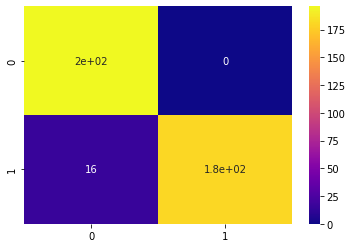

In [67]:
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)